# Task 1 (Predictive Modelling - Regression)

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

### Load Data

In [ ]:
data = pd.read_csv('4) house Prediction Data Set.csv')
print(data.head())

  0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00
0   0.02731   0.00   7.070  0  0.4690  6.4210  78...                                             
1   0.02729   0.00   7.070  0  0.4690  7.1850  61...                                             
2   0.03237   0.00   2.180  0  0.4580  6.9980  45...                                             
3   0.06905   0.00   2.180  0  0.4580  7.1470  54...                                             
4   0.02985   0.00   2.180  0  0.4580  6.4300  58...                                             


In [ ]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)


In [ ]:
df['Price'] = data.target
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude  Price
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88    -122.23  4.526
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86    -122.22  3.585
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85    -122.24  3.521
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85    -122.25  3.413
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85    -122.25  3.422


### Exploratory Data Analysis (EDA)

This stage is sueful for displaying data structure, missing values, and descriptive statistics.

In [ ]:
print(df.info()) # Data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [ ]:
print(df.isnull().sum()) # Checking missing values

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64


In [ ]:
print(df.describe()) #Descriptive Statistics

             MedInc      HouseAge      AveRooms  ...      Latitude     Longitude         Price
count  20640.000000  20640.000000  20640.000000  ...  20640.000000  20640.000000  20640.000000
mean       3.870671     28.639486      5.429000  ...     35.631861   -119.569704      2.068558
std        1.899822     12.585558      2.474173  ...      2.135952      2.003532      1.153956
min        0.499900      1.000000      0.846154  ...     32.540000   -124.350000      0.149990
25%        2.563400     18.000000      4.440716  ...     33.930000   -121.800000      1.196000
50%        3.534800     29.000000      5.229129  ...     34.260000   -118.490000      1.797000
75%        4.743250     37.000000      6.052381  ...     37.710000   -118.010000      2.647250
max       15.000100     52.000000    141.909091  ...     41.950000   -114.310000      5.000010

[8 rows x 9 columns]


Correlation visualization

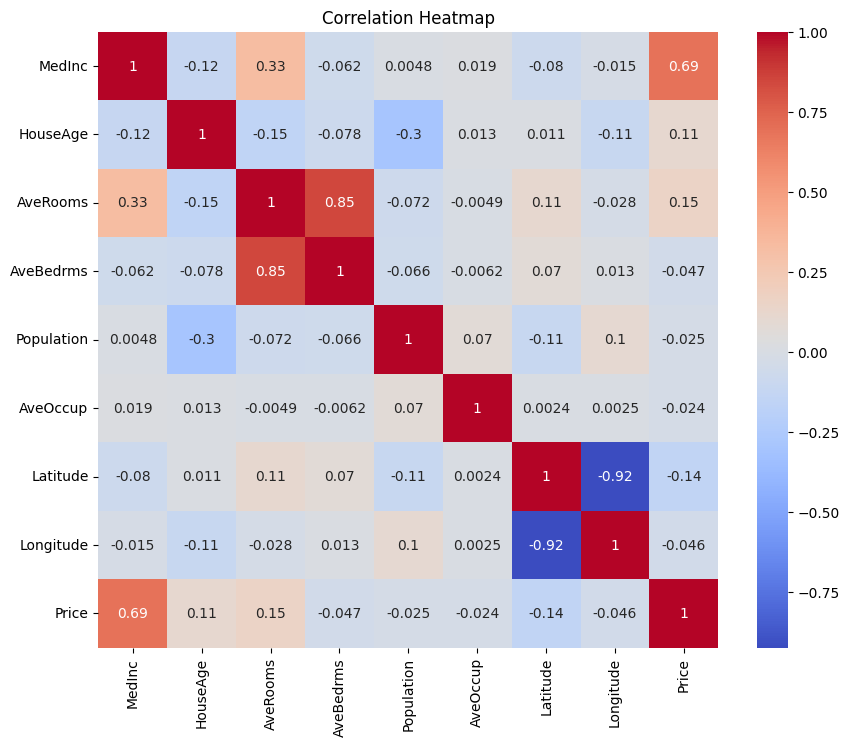

In [ ]:
plt.figure (figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Splitting Data (Training & Testing)

Split the dataset into training data (80%) and test data (20%)

In [ ]:
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Training Process

##### Decion trees

In [ ]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

#### Random forest

In [ ]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

### Evaluate model

In [ ]:
def evaluate_model(y_true, y_pred, model_name):
  print(f"== {model_name} ===")
  print("MAE :", mean_absolute_error(y_true, y_pred))
  print("MSE :", mean_squared_error(y_true, y_pred))
  print("RMSE :", np.sqrt(mean_squared_error(y_true, y_pred)))
  print("R2 Score :", r2_score(y_true, y_pred))
  print("\n")

evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")

== Decision Tree ===
MAE : 0.45467918846899225
MSE : 0.495235205629094
RMSE : 0.7037294974840077
R2 Score : 0.622075845135081


== Random Forest ===
MAE : 0.32754256845930246
MSE : 0.2553684927247781
RMSE : 0.5053399773665033
R2 Score : 0.8051230593157366




### Visualize the result

Shows a comparison between predicted results and actual values ​​in two subplots.

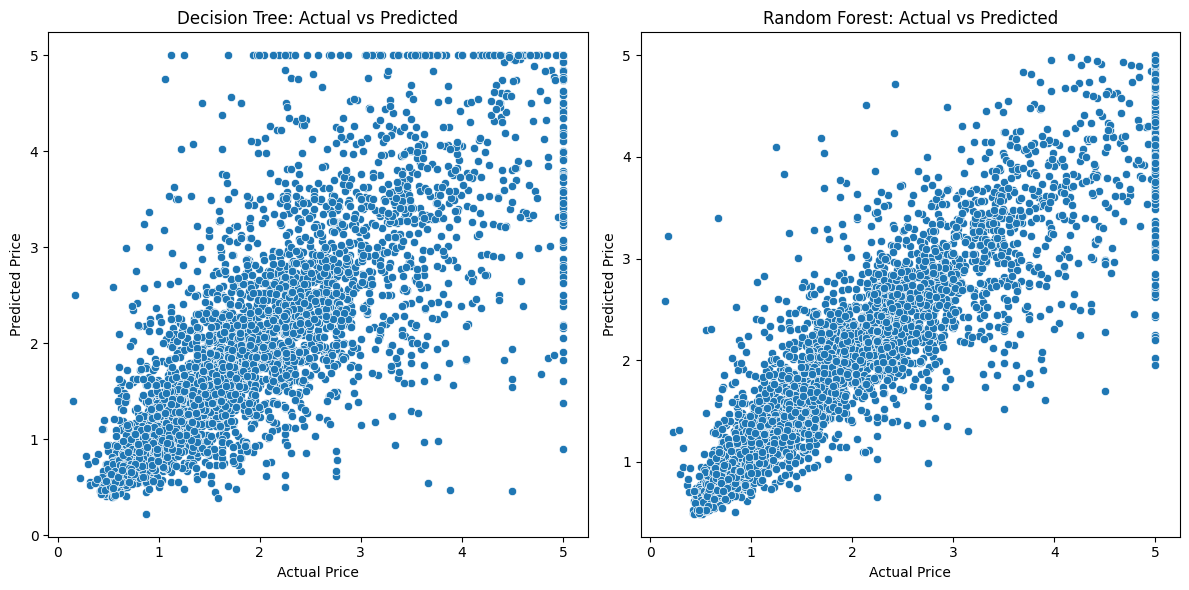

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_dt)
plt.title('Decision Tree: Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.tight_layout()
plt.show()